In [ ]:
# this mesh is nice and customizable but it does not work with FEniCS/Dolphin
# trying to setup simple testing square mesh suitable for evolutionary optimization
import gmsh
size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()


gmsh.model.add("test_mesh_warwick")

# preparing parameters
lc = 0.5     # mesh size

# defining a namespace
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
gmg.addPoint(0, 0, 0, lc, 1)
gmg.addPoint(0, size, 0, lc, 2)
gmg.addPoint(size, size, 0, lc, 3)
gmg.addPoint(size, 0, 0, lc, 4)
gmg.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmg.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmg.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmg.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)

gmg.addPoint(P * dx, 0, 0, lc, 9)
gmg.addPoint(P * dx, size, 0, lc, 10)
gmg.addPoint(size - P * dx, size, 0, lc, 11)
gmg.addPoint(size - P * dx, 0 , 0, lc, 12)



# adding lines
gmg.addLine(1, 2, 1)
gmg.addLine(2, 10, 2)
gmg.addLine(10, 11, 3)
gmg.addLine(11, 3, 4)
gmg.addLine(3, 4, 5)
gmg.addLine(4, 12, 6)
gmg.addLine(12, 9, 7)
gmg.addLine(9, 1, 8)
gmg.addLine(5, 6, 9)
gmg.addLine(6, 7, 10)
gmg.addLine(7, 8, 11)
gmg.addLine(8, 5, 12)

gmg.addLine(5, 9, 13)
gmg.addLine(10, 6, 14)
gmg.addLine(11, 7, 15)
gmg.addLine(8, 12, 16)
gmg.addLine(10, 9, 17)   # L inner-side
gmg.addLine(11, 12, 18)  # R inner-side

# defining a new surface:
gmg.addCurveLoop([1, 2, 17, 8], 20)  # left transfinite loop
gmg.addCurveLoop([-14, 3, 15, -10], 21)  # top transfinite loop
gmg.addCurveLoop([-18, 4, 5, 6], 22)  # right transfinite loop
gmg.addCurveLoop([-13, -12, 16, 7], 23)  # bottom transfinite loop
gmg.addCurveLoop([9, 10, 11, 12], 24)  # inner (hole) loop


gmg.addPlaneSurface([20], 1)  # left surface
gmg.addPlaneSurface([21], 2)  # top surface
gmg.addPlaneSurface([22], 3)  # right surface
gmg.addPlaneSurface([23], 4)  # bottom surface
#gmg.addPlaneSurface([24], 5)  # inner/infill surface   ### INFILL

# synchronize the model
gmg.synchronize()

# adding physical groups
gmsh.model.addPhysicalGroup(1, [1, 2, 3, 4, 5, 6, 7, 8], name="outerLoop") # curves physical group
gmsh.model.addPhysicalGroup(1, [9, 10, 11, 12], name="innerLoop") # curves physical group
gmsh.model.addPhysicalGroup(2, [1, 2, 3, 4], name="PerimeterSurface")   # surfaces physical group


# ftion 'setTransfiniteCurve()' explicitly specifies location of mesh nodes on the curve.
gmg.mesh.setTransfiniteCurve(1, num_el_y + 1)  # uniform points
gmg.mesh.setTransfiniteCurve(17, num_el_y + 1)
gmg.mesh.setTransfiniteCurve(5, num_el_y + 1)
gmg.mesh.setTransfiniteCurve(18, num_el_y + 1)

gmg.mesh.setTransfiniteCurve(3, num_el_x - 2*P + 1)
gmg.mesh.setTransfiniteCurve(10, num_el_x - 2*P + 1)
gmg.mesh.setTransfiniteCurve(7, num_el_x - 2*P + 1)
gmg.mesh.setTransfiniteCurve(12, num_el_x - 2*P + 1)

gmg.mesh.setTransfiniteCurve(2, P + 1)
gmg.mesh.setTransfiniteCurve(8, P + 1)
gmg.mesh.setTransfiniteCurve(6, P + 1)
gmg.mesh.setTransfiniteCurve(4, P + 1)

gmg.mesh.setTransfiniteCurve(14, P + 1)
gmg.mesh.setTransfiniteCurve(15, P + 1)
gmg.mesh.setTransfiniteCurve(13, P + 1)
gmg.mesh.setTransfiniteCurve(16, P + 1)

gmg.mesh.setTransfiniteCurve(9, num_el_y - 2*P + 1)
gmg.mesh.setTransfiniteCurve(11, num_el_y - 2*P + 1)

gmg.synchronize()

# meshing the transfinite surface
gmg.mesh.setTransfiniteSurface(1, "Left", [1, 2, 10, 9])  # set up the corners of interpolation
gmg.mesh.setTransfiniteSurface(2, "Right", [10, 11, 7, 6])  # set up the corners of interpolation
gmg.mesh.setTransfiniteSurface(3, "Right", [11, 3, 4, 12])  # set up the corners of interpolation
gmg.mesh.setTransfiniteSurface(4, "Right", [5, 8, 12, 9])  # set up the corners of interpolation
#gmg.mesh.setTransfiniteSurface(5, "Left", [5, 6, 7, 8])  # set up the corners of interpolation   ### INFILL


# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmg.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
#gmsh.write(f"./meshes/smallSquare.msh")

# Launch the GUI
gmg.synchronize()
gmsh.fltk.run()

# finish the session
gmsh.finalize()


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 30%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 40%] Meshing curve 7 (Line)
Info    : [ 40%] Meshing curve 8 (Line)
Info    : [ 50%] Meshing curve 9 (Line)
Info    : [ 50%] Meshing curve 10 (Line)
Info    : [ 60%] Meshing curve 11 (Line)
Info    : [ 70%] Meshing curve 12 (Line)
Info    : [ 70%] Meshing curve 13 (Line)
Info    : [ 80%] Meshing curve 14 (Line)
Info    : [ 80%] Meshing curve 15 (Line)
Info    : [ 90%] Meshing curve 16 (Line)
Info    : [ 90%] Meshing curve 17 (Line)
Info    : [100%] Meshing curve 18 (Line)
Info    : Done meshing 1D (Wall 0.000724195s, CPU 0.000991s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 30%] Meshing surface 2 (Transfinite)
Info    : [ 50%] Meshing surface 3 (Transfinite)
Info    : [ 80%

In [75]:
# SQUARE-OUTLINE mesh setup which will work with FEniCS/Dolphin
import gmsh
size = 40  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()


gmsh.model.add("small_square")

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
gmg.addPoint(0, 0, 0, lc, 1)
gmg.addPoint(0, size, 0, lc, 2)
gmg.addPoint(size, size, 0, lc, 3)
gmg.addPoint(size, 0, 0, lc, 4)
gmg.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmg.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmg.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmg.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)



# adding lines
gmg.addLine(1, 2, 1)
gmg.addLine(2, 3, 2)
gmg.addLine(3, 4, 3)
gmg.addLine(4, 1, 4)

gmg.addLine(5, 6, 5)
gmg.addLine(6, 7, 6)
gmg.addLine(7, 8, 7)
gmg.addLine(8, 5, 8)

# defining a new surface:
gmg.addCurveLoop([1, 2, 3, 4], 20)
gmg.addCurveLoop([5, 6, 7, 8], 21)


gmg.addPlaneSurface([20, 21], 1)  # perimeter surface
#gmg.addPlaneSurface([24], 5)  # inner/infill surface   ### INFILL

# synchronize the model
gmg.synchronize()

# adding physical groups
# gmsh.model.addPhysicalGroup(1, [1, 2, 3, 4, 5, 6, 7, 8], name="outerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(1, [9, 10, 11, 12], name="innerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(2, [1, 2, 3, 4], name="PerimeterSurface")   # surfaces physical group
gmg.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmg.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/smallSquare4000.msh")

# Launch the GUI
gmg.synchronize()
gmsh.fltk.run()

# finish the session
gmsh.finalize()


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00716007s, CPU 0.007476s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 4.45267s, CPU 4.37504s)
Info    : 15996 nodes 32000 elements
Info    : Writing './meshes/smallSquare4000.msh'...
Info    : Done writing './meshes/smallSquare4000.msh'
-------------------------------------------------------
Version       : 4.11.1
License       : GNU General Public License
Build OS      : MacOSX-sdk
Build date    : 20230510
Build host    : Mac-1683750338053.local
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[co

In [3]:
# SQUARE-OUTLINE + SQUARE-INFILL mesh setup which will work with FEniCS/Dolphin
import gmsh
size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y


# --- Create the Outline Mesh --------------------------------

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8"
gmsh.model.add(meshname)

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
gmg.addPoint(0, 0, 0, lc, 1)
gmg.addPoint(0, size, 0, lc, 2)
gmg.addPoint(size, size, 0, lc, 3)
gmg.addPoint(size, 0, 0, lc, 4)
gmg.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmg.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmg.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmg.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)



# adding lines
gmg.addLine(1, 2, 1)
gmg.addLine(2, 3, 2)
gmg.addLine(3, 4, 3)
gmg.addLine(4, 1, 4)

gmg.addLine(5, 6, 5)
gmg.addLine(6, 7, 6)
gmg.addLine(7, 8, 7)
gmg.addLine(8, 5, 8)

# defining a new surface:
gmg.addCurveLoop([1, 2, 3, 4], 20)
gmg.addCurveLoop([5, 6, 7, 8], 21)


gmg.addPlaneSurface([20, 21], 1)  # perimeter surface
#gmg.addPlaneSurface([24], 5)  # inner/infill surface   ### INFILL

# synchronize the model
gmg.synchronize()

# adding physical groups
# gmsh.model.addPhysicalGroup(1, [1, 2, 3, 4, 5, 6, 7, 8], name="outerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(1, [9, 10, 11, 12], name="innerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(2, [1, 2, 3, 4], name="PerimeterSurface")   # surfaces physical group
gmg.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmg.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
#gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
gmg.synchronize()
gmsh.fltk.run()

# finish the session
gmsh.finalize()


# --- Create the Infill Mesh ----------------------------------------

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8-infill"
gmsh.model.add(meshname)

# preparing parameters
Fn = 1       # finest of the mesh
lc = 2 * dx  # mesh size

# defining a namespace
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
# gmg.addPoint(0, 0, 0, lc, 1)
# gmg.addPoint(0, size, 0, lc, 2)
# gmg.addPoint(size, size, 0, lc, 3)
# gmg.addPoint(size, 0, 0, lc, 4)
gmg.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmg.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmg.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmg.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)



# adding lines
# gmg.addLine(1, 2, 1)
# gmg.addLine(2, 3, 2)
# gmg.addLine(3, 4, 3)
# gmg.addLine(4, 1, 4)

gmg.addLine(5, 6, 5)
gmg.addLine(6, 7, 6)
gmg.addLine(7, 8, 7)
gmg.addLine(8, 5, 8)

# defining a new surface:
gmg.addCurveLoop([5, 6, 7, 8], 22)
gmg.addPlaneSurface([22], 1)  # infill surface

# synchronize the model
gmg.synchronize()

gmg.mesh.setTransfiniteCurve(5, Fn * (num_el_y - 2) // 2 + 1 )
gmg.mesh.setTransfiniteCurve(6, Fn * (num_el_x - 2) // 2 + 1 )
gmg.mesh.setTransfiniteCurve(7, Fn * (num_el_y - 2) // 2 + 1 )
gmg.mesh.setTransfiniteCurve(8, Fn * (num_el_x - 2) // 2 + 1 )
gmg.synchronize()

# meshing the transfinite surface
gmg.mesh.setTransfiniteSurface(1, "Alternate", [5, 6, 7, 8])  # set up the corners of interpolation   ### INFILL

# synchronize the model
gmg.synchronize()


# adding physical groups
# gmsh.model.addPhysicalGroup(2, [1], name="InfillSurface")   # surfaces physical group
gmg.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmg.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
gmg.synchronize()
gmsh.fltk.run()

# finish the session
gmsh.finalize()




Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.000893043s, CPU 0.00133s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00150431s, CPU 0.001392s)
Info    : 28 nodes 64 elements
-------------------------------------------------------
Version       : 4.11.1
License       : GNU General Public License
Build OS      : MacOSX-sdk
Build date    : 20230510
Build host    : Mac-1683750338053.local
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack MathEx[contrib] Mesh Metis[contrib] Mpeg Netgen ONELAB ONELABM

<meshio mesh object>
  Number of points: 16
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 3
    line: 3
    line: 3
    line: 3
    triangle: 18
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical


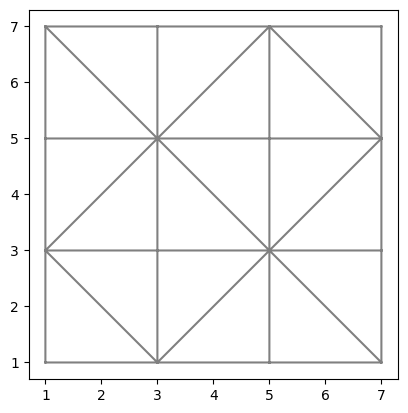

In [5]:
# trying to extract mesh elements coordinates
import meshio
from dolfin import *

def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read("./meshes/smallSquare8-infill.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle")
line_mesh = create_mesh(msh, "line")
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

plot(mesh)

In [15]:
# meshio entities
print(mesh.num_faces())
print(mesh.cells()[0])
print(mesh.coordinates())

18
[ 0  4 11]
[[1. 1.]
 [1. 7.]
 [7. 7.]
 [7. 1.]
 [1. 3.]
 [1. 5.]
 [3. 7.]
 [5. 7.]
 [7. 5.]
 [7. 3.]
 [5. 1.]
 [3. 1.]
 [3. 3.]
 [5. 3.]
 [3. 5.]
 [5. 5.]]


<meshio mesh object>
  Number of points: 156
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 20
    line: 20
    line: 20
    line: 20
    line: 19
    line: 19
    line: 19
    line: 19
    triangle: 156
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical
Solving linear variational problem.
sol u


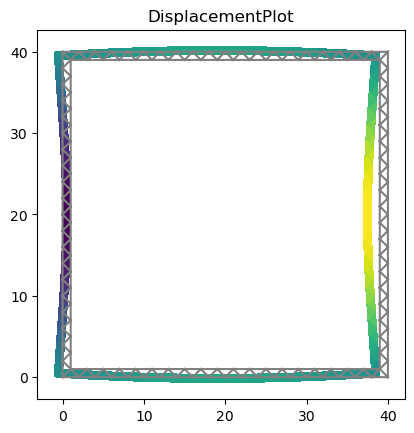

In [2]:
# small square mesh FEniCS based FEA

# FEniCS works for the imported mesh!
#from fenics import *
import meshio
from dolfin import *
from ufl import nabla_div


def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read("./meshes/smallSquare40.msh")
#msh = meshio.read("./meshes/smallSquare4000.msh")
# msh = meshio.read("./meshes/smallSquare.msh")
#msh = meshio.read("./meshes/warwick_mesh.msh")
#msh = meshio.read("./meshes/test_mesh7.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle")
line_mesh = create_mesh(msh, "line")
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

plot(mesh)

#boundaries = MeshFunction("size_t", mesh, dim=0)
#plot(boundaries)

# Define function space for system of PDEs
degree = 2
lambda_ = 1
mu = 1
V = VectorFunctionSpace(mesh, 'P', degree)

# Define boundary conditions
tol = 1.5


def clamped_middle(x, on_boundary): # beam is only fixed in the middle
    #return on_boundary and near(x[0], 0, tol) and near(x[1], 20, tol)#x[0] < tol
    return on_boundary and near(x[0], 0, tol) and near(x[1], 20, tol)#x[0] < tol


def force_in_middle(x, on_boundary):
    return on_boundary and near(x[0], 40, tol) and near(x[1], 20, tol)


# https://fenicsproject.discourse.group/t/transitioning-from-mesh-xml-to-mesh-xdmf-from-dolfin-convert-to-meshio/412/93

# Boundary conditions
bc1 = DirichletBC(V, Constant((-2, 0)), force_in_middle)
bc2 = DirichletBC(V, Constant((0, 0)), clamped_middle)

# Combine dirichlet boundary conditions
bcs = [bc1, bc2]

# Define strain and stress
def epsilon(u):  # strain
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))


def sigma(u):  # stress
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()     # space dimension
v = TestFunction(V)
f = Constant((0, 0))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = dot(f, v) * dx + dot(T, v) * ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
print('sol u')
plot(u, title='DisplacementPlot', mode='displacement')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00374471s, CPU 0.000987s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00861811s, CPU 0.001037s)
Info    : 28 nodes 64 elements
Info    : Writing './meshes/smallSquare8.msh'...
Info    : Done writing './meshes/smallSquare8.msh'
<meshio mesh object>
  Number of points: 28
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 4
    line: 4
    line: 4
    line: 4
    line: 3
    line: 3
    line: 3
    line: 3
    triangle: 28
  Cell sets: gmsh:bounding_entities
  P

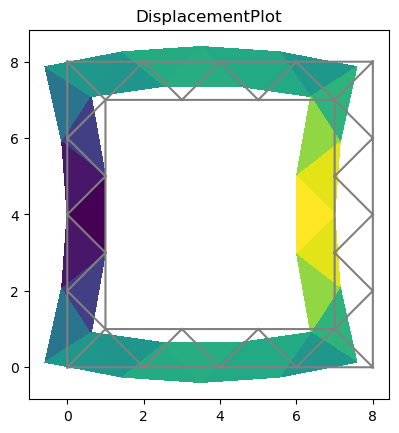

In [16]:
# gmsh mesh generation + FEniCS based FEA combined

import gmsh
import meshio
from dolfin import *
from ufl import nabla_div

# --- GMSH mesh generation --------------------------

size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8"
gmsh.model.add(meshname)

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
gmg.addPoint(0, 0, 0, lc, 1)
gmg.addPoint(0, size, 0, lc, 2)
gmg.addPoint(size, size, 0, lc, 3)
gmg.addPoint(size, 0, 0, lc, 4)
gmg.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmg.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmg.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmg.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)



# adding lines
gmg.addLine(1, 2, 1)
gmg.addLine(2, 3, 2)
gmg.addLine(3, 4, 3)
gmg.addLine(4, 1, 4)

gmg.addLine(5, 6, 5)
gmg.addLine(6, 7, 6)
gmg.addLine(7, 8, 7)
gmg.addLine(8, 5, 8)

# defining a new surface:
gmg.addCurveLoop([1, 2, 3, 4], 20)
gmg.addCurveLoop([5, 6, 7, 8], 21)


gmg.addPlaneSurface([20, 21], 1)  # perimeter surface
#gmg.addPlaneSurface([24], 5)  # inner/infill surface   ### INFILL

# synchronize the model
gmg.synchronize()

# adding physical groups
# gmsh.model.addPhysicalGroup(1, [1, 2, 3, 4, 5, 6, 7, 8], name="outerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(1, [9, 10, 11, 12], name="innerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(2, [1, 2, 3, 4], name="PerimeterSurface")   # surfaces physical group
gmg.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmg.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
# gmg.synchronize()
# gmsh.fltk.run()


# --- FEA in FEniCS -------------------------------
def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read(f"./meshes/{meshname}.msh")
#msh = meshio.read("./meshes/smallSquare4000.msh")
# msh = meshio.read("./meshes/smallSquare.msh")
#msh = meshio.read("./meshes/warwick_mesh.msh")
#msh = meshio.read("./meshes/test_mesh7.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle")
line_mesh = create_mesh(msh, "line")
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

from dolfin import *

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

plot(mesh)

#boundaries = MeshFunction("size_t", mesh, dim=0)
#plot(boundaries)

# Define function space for system of PDEs
degree = 2
lambda_ = 1
mu = 1
V = VectorFunctionSpace(mesh, 'P', degree)

# Define boundary conditions
tol = 1.5


def clamped_middle(x, on_boundary): # beam is only fixed in the middle
    #return on_boundary and near(x[0], 0, tol) and near(x[1], 20, tol)#x[0] < tol
    return on_boundary and near(x[0], 0, tol) and near(x[1], 4, tol)#x[0] < tol


def force_in_middle(x, on_boundary):
    return on_boundary and near(x[0], 8, tol) and near(x[1], 4, tol)


# https://fenicsproject.discourse.group/t/transitioning-from-mesh-xml-to-mesh-xdmf-from-dolfin-convert-to-meshio/412/93

# Boundary conditions
bc1 = DirichletBC(V, Constant((-1, 0)), force_in_middle)
bc2 = DirichletBC(V, Constant((0, 0)), clamped_middle)

# Combine dirichlet boundary conditions
bcs = [bc1, bc2]

# Define strain and stress
def epsilon(u):  # strain
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))


def sigma(u):  # stress
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()     # space dimension
v = TestFunction(V)
f = Constant((0, 0))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = dot(f, v) * dx + dot(T, v) * ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
print('sol u')
plot(u, title='DisplacementPlot', mode='displacement')

# finish the GMSH session
gmsh.finalize()

<built-in method intersect of PyCapsule object at 0x7fd88ef0cd80>
Info    : Cannot bind existing OpenCASCADE surface 1 to second tag 3
Info    : Could not preserve tag of 2D object 3 (->1)
BOUNDARY [(1, 13), (1, 14), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, -21), (1, -22), (1, -23), (1, -24), (1, -25)]
Outer [13, 14, 16, 17, 18, 19, 20, -21, -22, -23, -24, -25]
a [(2, 1), (2, 2)]
2
e (0, 9)
 - Boundary: []
e (0, 10)
 - Boundary: []
e (0, 11)
 - Boundary: []
e (0, 12)
 - Boundary: []
e (0, 13)
 - Boundary: []
e (0, 14)
 - Boundary: []
e (0, 15)
 - Boundary: []
e (0, 16)
 - Boundary: []
e (0, 17)
 - Boundary: []
e (0, 18)
 - Boundary: []
e (0, 19)
 - Boundary: []
e (0, 20)
 - Boundary: []
e (0, 21)
 - Boundary: []
e (0, 22)
 - Boundary: []
e (0, 23)
 - Boundary: []
e (1, 10)
 - Boundary: [(0, 9), (0, 10)]
e (1, 11)
 - Boundary: [(0, 10), (0, 11)]
e (1, 12)
 - Boundary: [(0, 9), (0, 11)]
e (1, 13)
 - Boundary: [(0, 12), (0, 13)]
e (1, 14)
 - Boundary: [(0, 13), (0, 14)]
e (1, 16)


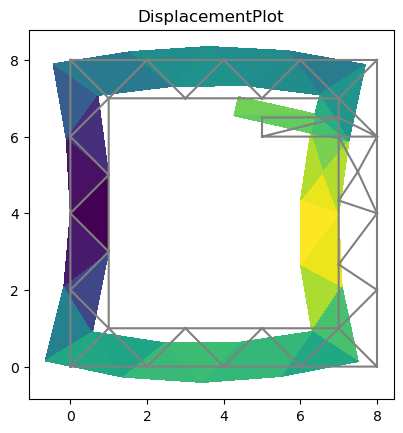

In [14]:
# Island + overlapping curve/surfaces testing
# gmsh mesh generation + FEniCS based FEA combined

import gmsh
import meshio
from dolfin import *
from ufl import nabla_div

# --- GMSH mesh generation --------------------------

size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8-edited"
gmsh.model.add(meshname)

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmo = gmsh.model.occ  # gmg ~ gmsh.model.geo

# defining the points
gmo.addPoint(0, 0, 0, lc, 1)
gmo.addPoint(0, size, 0, lc, 2)
gmo.addPoint(size, size, 0, lc, 3)
gmo.addPoint(size, 0, 0, lc, 4)
gmo.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmo.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmo.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmo.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)

# adding lines
gmo.addLine(1, 2, 1)
gmo.addLine(2, 3, 2)
gmo.addLine(3, 4, 3)
gmo.addLine(4, 1, 4)

gmo.addLine(5, 6, 5)
gmo.addLine(6, 7, 6)
gmo.addLine(7, 8, 7)
gmo.addLine(8, 5, 8)

# defining a new surface:
gmo.addCurveLoop([1, 2, 3, 4], 20)
gmo.addCurveLoop([5, 6, 7, 8], 21)
surf = gmo.addPlaneSurface([20, 21])  # perimeter surface

#print('surf', dir(surf))###
#print('surf', surf)



# adding an island
gmo.addPoint(5, 4, 0, lc, 9)
gmo.addPoint(5, 5, 0, lc, 10)
gmo.addPoint(6, 4, 0, lc, 11)
gmo.addLine(9, 10, 10)
gmo.addLine(10, 11, 11)
gmo.addLine(11, 9, 12)
gmo.addCurveLoop([10, 11, 12], 22)
gmo.addPlaneSurface([22], 2)  # island surface
gmo.synchronize()

# adding an island 2
gmo.addPoint(5, 6, 0, lc, 12)
gmo.addPoint(5, 6.5, 0, lc, 13)
gmo.addPoint(7, 6.5, 0, lc, 14)
gmo.addPoint(7, 6, 0, lc, 15)
gmo.addLine(12, 13, 13)
gmo.addLine(13, 14, 14)
gmo.addLine(14, 15, 15)
gmo.addLine(15, 12, 16)
gmo.addCurveLoop([13, 14, 15, 16], 23)
gmo.addPlaneSurface([23], 3)  # island surface
gmo.synchronize()


#intersect = gmo.intersect([(2, 1)], [(2, 3)], removeObject=False, removeTool=False)[0]
print(intersect)
fused = gmo.fuse([(2, surf)], [(2, 2), (2, 3)], removeObject=True, removeTool=True) # Fusion
# gmo.intersect([(2, 1)], [(2, 2)], 100) # Fusion

gmo.synchronize()
print('BOUNDARY', gmsh.model.getBoundary([(2, surf)]))###
Boundary = [tg for tp, tg in gmsh.model.getBoundary([(2, surf)])]
print('Outer', Boundary)


#print(fused)
#print(dir(fused))
a = fused.__getitem__(0)###
print('a', a)###
print(len(a))###


entities = gmsh.model.getEntities()
for e in entities:
    print('e', e)
    print(" - Boundary: " + str(gmsh.model.getBoundary([e])))

# partitions = gmsh.model.getPartitions(e[0], e[1])
    # if len(partitions):
    #     print("Entity " + str(e) + " of type " +
    #           gmsh.model.getType(e[0], e[1]))
    #     print(" - Partition(s): " + str(partitions))
    #     print(" - Parent: " + str(gmsh.model.getParent(e[0], e[1])))

# adding a `peninsula'
# gmo.synchronize()
# gmo.addPoint(3, 7, 0, lc, 9)
# gmo.addPoint(4, 7, 0, lc, 10)
# gmo.addPoint(3, 4, 0, lc, 11)
# gmo.addLine(9, 10, 10)
# gmo.addLine(10, 11, 11)
# gmo.addLine(11, 9, 12)
# gmo.addCurveLoop([10, 11, 12], 22)
# gmo.addPlaneSurface([22], 2)  # peninsula surface
# gmo.synchronize()
#gmsh.model.occ.fuse([(2, 1)], [(2, 2)], 100) # Fusion
# gmsh.model.occ.intersect([(3, 1)], [(3, 2)], 3)  # Intersection
# gmsh.model.occ.cut([(2, 3)], [(2, 7)], 8)        # Cutting

# synchronize the model
gmo.synchronize()

# adding physical groups
gmsh.model.addPhysicalGroup(1, Boundary, name="outerLoop") # curves physical group
#gmsh.model.addPhysicalGroup(1, [5], name="innerLoop") # curves physical group
gmsh.model.addPhysicalGroup(2, [surf], name="PerimeterSurface")   # surfaces physical group
gmo.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmo.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
gmo.synchronize()
#gmsh.fltk.run()

#'''
# --- FEA in FEniCS -------------------------------
def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read(f"./meshes/{meshname}.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle")
line_mesh = create_mesh(msh, "line")
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

from dolfin import *

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

plot(mesh)

#boundaries = MeshFunction("size_t", mesh, dim=0)
#plot(boundaries)

# Define function space for system of PDEs
degree = 2
lambda_ = 1
mu = 1
V = VectorFunctionSpace(mesh, 'P', degree)

# Define boundary conditions
tol = 1.5


def clamped_middle(x, on_boundary): # beam is only fixed in the middle
    #return on_boundary and near(x[0], 0, tol) and near(x[1], 20, tol)#x[0] < tol
    return on_boundary and near(x[0], 0, tol) and near(x[1], 4, tol)#x[0] < tol


def force_in_middle(x, on_boundary):
    return on_boundary and near(x[0], 8, tol) and near(x[1], 4, tol)


# https://fenicsproject.discourse.group/t/transitioning-from-mesh-xml-to-mesh-xdmf-from-dolfin-convert-to-meshio/412/93

# Boundary conditions
bc1 = DirichletBC(V, Constant((-1, 0)), force_in_middle)
bc2 = DirichletBC(V, Constant((0, 0)), clamped_middle)

# Combine dirichlet boundary conditions
bcs = [bc1, bc2]

# Define strain and stress
def epsilon(u):  # strain
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))


def sigma(u):  # stress
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()     # space dimension
v = TestFunction(V)
f = Constant((0, 0))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = dot(f, v) * dx + dot(T, v) * ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
print('sol u')
plot(u, title='DisplacementPlot', mode='displacement')

# finish the GMSH session

#'''
gmsh.finalize()

In [140]:
from random import shuffle
for x, y in infill_coords:
    print(x, y)

1.0 1.0
1.0 7.0
7.0 7.0
7.0 1.0
1.0 3.0
1.0 5.0
3.0 7.0
5.0 7.0
7.0 5.0
7.0 3.0
5.0 1.0
3.0 1.0
3.0 3.0
5.0 3.0
3.0 5.0
5.0 5.0


In [418]:
# trying to extract mesh elements coordinates to form an element vector - ADDITIVE APPROACH
import meshio
from dolfin import *
import numpy as np

def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read("./meshes/smallSquare8-infill.msh")
print(msh)

infill_triangles = create_mesh(msh, "triangle")
infill_lines = create_mesh(msh, "line")
meshio.write("mesh.xdmf", infill_triangles)
meshio.write("mf.xdmf", infill_lines)

infill_mesh = Mesh()
mvc = MeshValueCollection("size_t", infill_mesh, infill_mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(infill_mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(infill_mesh, mvc)

mvc = MeshValueCollection("size_t", infill_mesh, infill_mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(infill_mesh, mvc)
#plot(infill_mesh)

infill_connect = infill_mesh.cells()       # triangle connectivity of the infill mesh
infill_coords = infill_mesh.coordinates()  # coordinates within the infill mesh
infill_coords = np.round(infill_coords, 4) # rounding the coordinates
num_el = len(infill_connect)               # number of infill elements



# --- GMSH -----------------------------------
# creating a modifiable interior in gmsh based on the infill mesh
infill_vec = np.random.randint(0, 2, size=num_el)  # vector of 1's and 0's if element is included
infill_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
infill_vec = np.ones(18)
size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8-vecEl"
gmsh.model.add(meshname)

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmo = gmsh.model.occ  # gmg ~ gmsh.model.geo

# defining the points
gmo.addPoint(0, 0, 0, lc, 1)
gmo.addPoint(0, size, 0, lc, 2)
gmo.addPoint(size, size, 0, lc, 3)
gmo.addPoint(size, 0, 0, lc, 4)
gmo.addPoint(0 + P * dx, 0 + P * dy, 0, lc, 5)
gmo.addPoint(0 + P * dx, size - P * dy, 0, lc, 6)
gmo.addPoint(size - P * dx, size - P * dy, 0, lc, 7)
gmo.addPoint(size - P * dx, 0 + P * dy, 0, lc, 8)

# adding lines
gmo.addLine(1, 2, 1)
gmo.addLine(2, 3, 2)
gmo.addLine(3, 4, 3)
gmo.addLine(4, 1, 4)

gmo.addLine(5, 6, 5)
gmo.addLine(6, 7, 6)
gmo.addLine(7, 8, 7)
gmo.addLine(8, 5, 8)

# defining a new surface:
gmo.addCurveLoop([1, 2, 3, 4], 20)
gmo.addCurveLoop([5, 6, 7, 8], 21)
surf = gmo.addPlaneSurface([20, 21])  # perimeter surface

# adding individual infill elements
infill_points = []   # list of point tags inside the infill
for x, y in infill_coords:
    infill_points.append(gmo.addPoint(x, y, 0, lc))  # add each point

infill_lines = []   # list of line tags inside the infill
infill_curves = []  # list of curve tags inside the infill
infill_surfs = []   # list of surface tags
surf_centres = []   # list of surface centers for dilation
for i, tri in enumerate(infill_connect):   # get each point in each triangle
    if infill_vec[i]:
        p1, p2, p3 = tri[0], tri[1], tri[2]
        tp1 = infill_points[p1]  # tag of p1
        tp2 = infill_points[p2]  # tag of p2
        tp3 = infill_points[p3]  # tag of p3
        l1 = gmo.addLine(tp1, tp2)  # tag of line 1
        l2 = gmo.addLine(tp2, tp3)  # tag of line 2
        l3 = gmo.addLine(tp3, tp1)  # tag of line 3
        xp1, yp1 = infill_coords[p1, 0], infill_coords[p1, 1]  # getting coords of p1
        xp2, yp2 = infill_coords[p2, 0], infill_coords[p2, 1]  # getting coords of p2
        xp3, yp3 = infill_coords[p3, 0], infill_coords[p3, 1]  # getting coords of p3
        xc, yc = (xp1 + xp2 + xp3)/3, (yp1 + yp2 + yp3)/3  # centre of the triangle
        surf_centres.append((xc, yc))
        infill_lines.append(l1)
        infill_lines.append(l2)
        infill_lines.append(l3)
        c1 = gmo.addCurveLoop([l1, l2, l3])
        s1 = gmo.addPlaneSurface([c1])  # create the surface
        infill_curves.append(c1)
        infill_surfs.append(s1)
gmo.synchronize()

surfs_to_fuse = [(2, tag) for tag in infill_surfs]  # list of all surfs
if len(surfs_to_fuse) > 0:
    # Fusion all in one
    #fused = gmo.fuse([(2, surf)], surfs_to_fuse, removeObject=True, removeTool=False)


    # Fusion one by one
    # for i, isurf in enumerate(surfs_to_fuse):
    #     print('isurf', isurf)###
    #     (xc, yc) = surf_centres[i]
    #     print(xc, yc)
    #     # gmo.dilate([isurf], xc, yc, 0, 1.5, 1.5, 1)  # Dilation
    #     print(isurf2)
    #     gmo.fuse([(2, surf)], [isurf], removeObject=True, removeTool=True)
        #gmo.fragment([(2, surf)], [isurf], removeObject=True, removeTool=False)

    # manual one-by-one
    gmo.fuse([(2, surf)], [surfs_to_fuse[0]], removeObject=True, removeTool=True)  # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[1]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[2]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[3]], removeObject=True, removeTool=True)  # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[4]], removeObject=True, removeTool=True)  # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[5]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[6]], removeObject=True, removeTool=True)  # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[7]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[8]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[9]], removeObject=True, removeTool=True)  # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[10]], removeObject=True, removeTool=True) # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[11]], removeObject=True, removeTool=True) # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[12]], removeObject=True, removeTool=True) # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[13]], removeObject=True, removeTool=True) #yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[14]], removeObject=True, removeTool=True) # yes
    gmo.fuse([(2, surf)], [surfs_to_fuse[15]], removeObject=True, removeTool=True) # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[16]], removeObject=True, removeTool=True) # no
    gmo.fuse([(2, surf)], [surfs_to_fuse[17]], removeObject=True, removeTool=True) # no

    #gmo.healShapes([(2, surf)])
    #print(surf)




    #fused = gmo.fuse([(2, surf)], surfs_to_fuse, removeObject=True, removeTool=False) # Fusion
    #fused = gmo.fuse([(2, surf)], surfs_to_fuse, removeObject=True, removeTool=False) # Fusion
    #fused = gmo.fuse([(2, surf)], surfs_to_fuse, removeObject=True, removeTool=True) # Fusion
    gmo.synchronize()

# extract the curve boundary
Boundary = [tg for tp, tg in gmsh.model.getBoundary([(2, surf)])]

# adding physical groups
gmsh.model.addPhysicalGroup(1, Boundary, name="outerLoop") # curves physical group
# gmsh.model.addPhysicalGroup(1, [5], name="innerLoop") # curves physical group
gmsh.model.addPhysicalGroup(2, [surf], name="PerimeterSurface")   # surfaces physical group
gmo.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes

# generate the mesh
gmo.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
gmo.synchronize()
gmsh.fltk.run()

# finish the GMSH session
gmsh.finalize()

<meshio mesh object>
  Number of points: 16
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 3
    line: 3
    line: 3
    line: 3
    triangle: 18
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00067953s, CPU 0.000782s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00660312s, CPU 0.006521s)
Info    : 44 nodes 80 elements
Info    : Writing './meshes/smallSquare8-vecEl.msh'...
Info    : Done writing './meshes/smallSquare8-vecEl.msh'
-------------------------------------

<meshio mesh object>
  Number of points: 16
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 3
    line: 3
    line: 3
    line: 3
    triangle: 18
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 30%] Meshing curve 7 (Line)
Info    : [ 40%] Meshing curve 8 (Line)
Info    : [ 40%] Meshing curve 9 (Line)
Info    : [ 50%] Meshing curve 10 (Line)
Info    : [ 50%] Meshing curve 11 (Line)
Info    : [ 60%] Meshing curve 12 (Line)
Info    : [ 60%] Meshing curve 13 (Line)
Info    : [ 70%] Meshing curve 14 (Line)
Info    : [ 70%] Meshing curve 15 (Line)
Info    : [ 80%] Meshing curve 16 (Line)
Info    : [ 80%] Meshing curve 17 (Line)
Info    : 

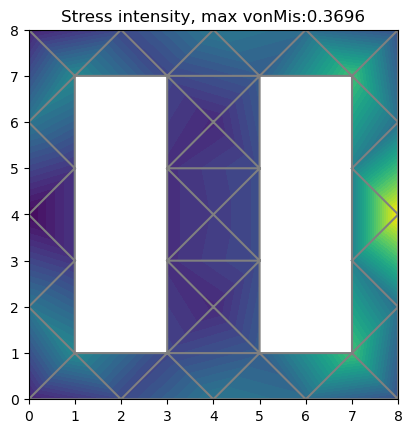

In [540]:
# trying to extract mesh elements coordinates to form an element vector - SUBTRACTIVE APPROACH
import meshio
from dolfin import *
import numpy as np

def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read("./meshes/smallSquare8-infill.msh")
print(msh)

infill_triangles = create_mesh(msh, "triangle")
infill_lines = create_mesh(msh, "line")
meshio.write("mesh.xdmf", infill_triangles)
meshio.write("mf.xdmf", infill_lines)

infill_mesh = Mesh()
mvc = MeshValueCollection("size_t", infill_mesh, infill_mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(infill_mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(infill_mesh, mvc)

mvc = MeshValueCollection("size_t", infill_mesh, infill_mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(infill_mesh, mvc)
#plot(infill_mesh)

infill_connect = infill_mesh.cells()       # triangle connectivity of the infill mesh
infill_coords = infill_mesh.coordinates()  # coordinates within the infill mesh
infill_coords = np.round(infill_coords, 4) # rounding the coordinates
num_el = len(infill_connect)               # number of infill elements



# --- GMSH -----------------------------------
# creating a modifiable interior in gmsh based on the infill mesh
#infill_vec = np.random.randint(0, 2, size=num_el)  # vector of 1's and 0's if element is included
infill_vec = np.ones(18)
#infill_vec = np.zeros(18)
infill_vec = [0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0]
#infill_vec = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
#infill_vec = [0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0]
size = 8  # physical dimension of the side
P = 1     # number of perimeters
width, height = size, size       # setting up the square
num_el_x, num_el_y = size, size  # adjust the num of elements
dx, dy = width / num_el_x, height / num_el_y

# initialize Gmsh
if not gmsh.is_initialized():
    gmsh.initialize()

meshname = "smallSquare8-vecEl-substractive"
gmsh.model.add(meshname)

# preparing parameters
lc = 2 * dx     # mesh size

# defining a namespace
gmo = gmsh.model.occ  # gmo ~ gmsh.model.opencascade
gmg = gmsh.model.geo  # gmg ~ gmsh.model.geo

# defining the points
gmo.addPoint(0, 0, 0, lc, 1)
gmo.addPoint(0, size, 0, lc, 2)
gmo.addPoint(size, size, 0, lc, 3)
gmo.addPoint(size, 0, 0, lc, 4)

# adding lines
gmo.addLine(1, 2, 1)
gmo.addLine(2, 3, 2)
gmo.addLine(3, 4, 3)
gmo.addLine(4, 1, 4)

# defining a new surface:
gmo.addCurveLoop([1, 2, 3, 4], 20)
surf = gmo.addPlaneSurface([20])  # full surface
gmo.synchronize()

# meshing the transfinite surface
gmsh.model.mesh.setTransfiniteCurve(1, num_el_x + 1)
gmsh.model.mesh.setTransfiniteCurve(2, num_el_x + 1)
gmsh.model.mesh.setTransfiniteCurve(3, num_el_x + 1)
gmsh.model.mesh.setTransfiniteCurve(4, num_el_x + 1)
gmo.synchronize()
gmsh.model.mesh.setTransfiniteSurface(surf, arrangement="Alternate", cornerTags=[1,2,3,4])


# subtracting individual infill elements
infill_points = []   # list of point tags inside the infill
for x, y in infill_coords:
    infill_points.append(gmo.addPoint(x, y, 0, lc))  # add each point

infill_lines = []   # list of line tags inside the infill
infill_curves = []  # list of curve tags inside the infill
infill_surfs = []   # list of surface tags
#surf_centres = []   # list of surface centers for dilation
for i, tri in enumerate(infill_connect):   # get each point in each triangle
    if infill_vec[i] == 0:                 # only if is to be deleted (0: not included)
        p1, p2, p3 = tri[0], tri[1], tri[2]
        tp1 = infill_points[p1]  # tag of p1
        tp2 = infill_points[p2]  # tag of p2
        tp3 = infill_points[p3]  # tag of p3
        l1 = gmo.addLine(tp1, tp2)  # tag of line 1
        l2 = gmo.addLine(tp2, tp3)  # tag of line 2
        l3 = gmo.addLine(tp3, tp1)  # tag of line 3
        xp1, yp1 = infill_coords[p1, 0], infill_coords[p1, 1]  # getting coords of p1
        xp2, yp2 = infill_coords[p2, 0], infill_coords[p2, 1]  # getting coords of p2
        xp3, yp3 = infill_coords[p3, 0], infill_coords[p3, 1]  # getting coords of p3
        xc, yc = (xp1 + xp2 + xp3)/3, (yp1 + yp2 + yp3)/3  # centre of the triangle
        surf_centres.append((xc, yc))
        infill_lines.append(l1)
        infill_lines.append(l2)
        infill_lines.append(l3)
        c1 = gmo.addCurveLoop([l1, l2, l3])
        s1 = gmo.addPlaneSurface([c1])  # create the surface
        infill_curves.append(c1)
        infill_surfs.append(s1)
gmo.synchronize()

surfs_to_cut = [(2, tag) for tag in infill_surfs]  # list of all surfs
if len(surfs_to_cut) > 0:
    # substract all in one
    outlab = gmo.cut([(2, surf)], surfs_to_cut, removeObject=True, removeTool=True)
    surf = outlab[0][0][1]
    gmo.synchronize()

# extract the curve boundary
Boundary = [tg for tp, tg in gmsh.model.getBoundary([(2, surf)])]

# adding physical groups
gmsh.model.addPhysicalGroup(1, Boundary, name="SurfaceLoop") # curves physical group
gmsh.model.addPhysicalGroup(2, [surf], name="PerimeterSurface")   # surfaces physical group
gmo.synchronize()

# global meshing options
gmsh.option.setNumber("Mesh.Algorithm", 6)  # Frontal-Delaunay for 2D meshes


# generate the mesh
gmo.synchronize()
gmsh.model.mesh.generate(2)

# saving the mesh
gmsh.write(f"./meshes/{meshname}.msh")

# Launch the GUI
gmo.synchronize()
gmsh.fltk.run()

# finish the GMSH session
gmsh.finalize()
#'''
# --- FEA in FEniCS -------------------------------
def create_mesh(mesh, cell_type):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

msh = meshio.read(f"./meshes/{meshname}.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle")
line_mesh = create_mesh(msh, "line")
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

from dolfin import *

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

plot(mesh)

#boundaries = MeshFunction("size_t", mesh, dim=0)
#plot(boundaries)

# Define function space for system of PDEs
degree = 2
lambda_ = 1
mu = 1
V = VectorFunctionSpace(mesh, 'P', degree)

# Define boundary conditions
tol = 2
def clamped_middle(x, on_boundary): # beam is only fixed in the middle
    #return on_boundary and near(x[0], 0, tol) and near(x[1], 20, tol)#x[0] < tol
    return on_boundary and near(x[0], 0 + 0.5, tol) and near(x[1], 4, tol)#x[0] < tol

# https://fenicsproject.discourse.group/t/transitioning-from-mesh-xml-to-mesh-xdmf-from-dolfin-convert-to-meshio/412/93

# Boundary conditions
bc1 = DirichletBC(V, Constant((0, 0)), clamped_middle)

# Combine dirichlet boundary conditions
#bcs = [bc1, bc2]
bcs = [bc1]

# Define strain and stress
def epsilon(u):  # strain
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))

def sigma(u):   # stress
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

class Delta(UserExpression):  # delta function for point load
    def __init__(self, eps, x0, **kwargs):
        self.eps = eps
        self.x0 = x0
        UserExpression.__init__(self, **kwargs)
    def eval(self, values, x):
        eps = self.eps
        values[0] = eps/pi/(np.linalg.norm(x-self.x0)**2 + eps**2)
        values[1] = 0

    def value_shape(self): return (2, )

delta = Delta(eps=1E-4, x0=np.array([7.5, 4]), degree=5)  # point load at x0


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()   # space dimension
v = TestFunction(V)
f = Constant((0, 0))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = inner(Constant(-150) * delta, v) * dx#dot(f, v) * dx + dot(T, v) * ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Displacement measures
V1 = FunctionSpace(mesh, 'P', 1)
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V1)
u_magnitude = u_magnitude.vector()
disp_len = u_magnitude.size()
disp_max = u_magnitude.max()   # maximal displacement
disp_tot = u_magnitude.sum()   # total/sum displacement
disp_avg = disp_tot / disp_len # average displacement

# Plot Displacement solution
print('sol u')
title_str = f"Displacement \n max:{round(disp_max,3)}  tot:{round(disp_tot,3)}  avg:{round(disp_avg,3)}"
#plot(u, title=title_str, mode='displacement')


# plot Von Mises Stress
V1 = FunctionSpace(mesh, 'P', 1)
s = sigma(u) - (1./3) * tr(sigma(u)) * Identity(d)  # deviatoric stress
von_Mises = sqrt(3./2 * inner(s, s))
von_Mises = project(von_Mises, V1)

max_von_Mises = von_Mises.vector().max()  # getting maximal von Mises stress
max_to_print = round(max_von_Mises, 4)
plot(von_Mises, title=f"Stress intensity, max vonMis:{max_to_print}")
#'''